In [58]:
import numpy as np
import matplotlib.pyplot as plt

In [129]:
# data generation
# payam's formulation

# generation of the data:

E = 2
de = 1
dc = 1
d = de + dc

muc = -1
sigc = 1

mue = [1,3]
# sigenv = np.array([[1,0],[0,3]])
sige = [1,3]
muTe = [3]
sigTe = [4]

def f(x):
    return x.dot(np.array([[1,3],[0,1]]))

def phi(phimat, x):
    trunc = np.pad(np.eye(dc), ((0,de),(0,de)), 'constant', constant_values=0  )
    return x @ phimat @ trunc


# finv = np.array([[1,-3],[0,1]])
# print ( phi(finv, f(np.array([3,4]).T)))
n = 50

In [130]:
Z = np.zeros((0,d))
y = np.zeros((0,1))

# generating latent features
for i in range(len(mue)):
    ye = np.random.randint(0,2,(n,1)) * 2 -1
    Ze = np.random.randn(n, de) * sige[i] + ye * mue[i]
    Zc = np.random.randn(n, de) * sigc + ye * muc
    Znew = np.concatenate((Zc,Ze),axis=1)
    Z = np.concatenate((Z, Znew),axis=0)
    y = np.concatenate((y,ye), axis=0)

# generating data
X = f(Z)

print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


In [131]:
# generating test data in a new unseen environment
Zte = np.zeros((0,d))
yte = np.zeros((0,1))

# generating latent features
for i in range(len(muTe)):
    ye = np.random.randint(0,2,(n,1)) * 2 -1
    Ze = np.random.randn(n, de) * sigTe[i] + ye * muTe[i]
    Zc = np.random.randn(n, de) * sigc + ye * muc
    Znew = np.concatenate((Zc,Ze),axis=1)
    Zte = np.concatenate((Zte, Znew),axis=0)
    yte = np.concatenate((yte,ye), axis=0)

Xte = f(Zte)
print(Zte.shape)
print(yte.shape)

(50, 2)
(50, 1)


In [132]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import zero_one_loss
print(X.shape)
print(y.shape)
logreg = LogisticRegression()
logreg.fit(X,y)

(100, 2)
(100, 1)


D:\programs\pip\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


LogisticRegression()

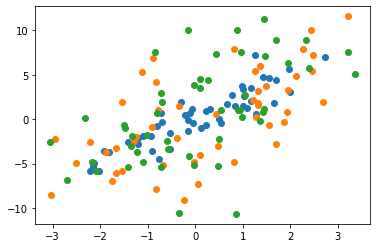

In [133]:
plt.scatter(X[0:50,0],X[0:50,1])
plt.scatter(X[50:-1,0],X[50:-1,1])
plt.scatter(Xte[:,0],Xte[:,1])

In [134]:
y_pred = logreg.predict(Xte)
zero_one_loss(yte, y_pred)

0.12

In [149]:
import numpy as np
from scipy.optimize import minimize
from sklearn.metrics import log_loss

def objective(p, X, c1, c2): #bfgs
    # phi = first 4
    # beta = next 2
    # mu = next 1
    phimat = np.array(p[0:4]).reshape((2,2))
    beta = p[4:6]
    mu = p[-1]

    risk = 0
    reg = 0
    env_reg = 0 

    #X is the dataset. 
    # x: (n,d) vector where d is the length of x
    Zhat = phi(phimat, X)
    y_pred = Zhat @ beta
    risk = log_loss(y, y_pred)

    # regularizer term:

    
    return risk + c1 * reg + c2 * env_reg


p =  np.random.rand(7)
c1 = 1
c2 = 1
print(objective(p, X, c1, c2))
# is it convex? cvxpy

[0.916024   0.64211566]
23.618870275726394
